In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [9]:
df = pd.read_csv('energy_dataset.csv')
df2 = pd.read_csv('weather_features.csv')

In [10]:
df.drop(columns=['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore','forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'], inplace=True)   #Drop all the unnecessary energy readings, only wind power and timestamp are needed
       
df2.drop(columns=['temp_min', 'temp_max','rain_1h', 'rain_3h', 'snow_3h',           
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'], inplace=True) #Only timestamp, city, temperature, humidity, pressure, wind speed and wind direction are needed

In [11]:
ValenciaWeather = df2[df2['city_name'] == 'Valencia'].drop(columns=['city_name'])
MadridWeather = df2[df2['city_name'] == 'Madrid'].drop(columns=['city_name'])
BilbaoWeather = df2[df2['city_name'] == 'Bilbao'].drop(columns=['city_name'])
SevilleWeather = df2[df2['city_name'] == 'Seville'].drop(columns=['city_name'])
BarcelonaWeather = df2[df2['city_name'] == ' Barcelona'].drop(columns=['city_name'])
#Split weather data into 5 dataframes based on the city it is in

ValenciaWeather.columns =['time','ValTemp', 'ValPressure', 'ValHumidity', 'ValWind_speed', 'ValWind_deg']
MadridWeather.columns =['time','MadTemp', 'MadPressure', 'MadHumidity', 'MadWind_speed', 'MadWind_deg']
BilbaoWeather.columns =['time','BilTemp', 'BilPressure', 'BilHumidity', 'BilWind_speed', 'BilWind_deg']
SevilleWeather.columns =['time','SevTemp', 'SevPressure', 'SevHumidity', 'SevWind_speed', 'SevWind_deg']
BarcelonaWeather.columns =['time','BarTemp', 'BarPressure', 'BarHumidity', 'BarWind_speed', 'BarWind_deg']

merged_df = ValenciaWeather.merge(MadridWeather, how='left', on = ['time']).merge(
    BilbaoWeather, how='left', on = ['time']).merge(SevilleWeather, how='left', on = ['time']).merge(BarcelonaWeather, how='left', on = ['time']
    ).merge(df, how='left', on=['time']).dropna()
#Join all of the dataframes based on the timestamp

merged_df.drop(columns=['time'],inplace=True)
#We no longer need the time, now that we have joined the tables


In [12]:
X = merged_df.drop(columns=['generation wind onshore']).to_numpy()
y = merged_df['generation wind onshore'].to_numpy()

X_rem, X_train, y_rem, y_train = train_test_split(X,y, test_size=0.60, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

In [30]:
lin_regr = LinearRegression() 
poly = PolynomialFeatures(degree=3) 
X_train_poly = poly.fit_transform(X_train)
lin_regr.fit(X_train_poly, y_train)  
y_pred_train = lin_regr.predict(X_train_poly)
tr_error = mean_squared_error(y_train, y_pred_train)
X_val_poly = poly.transform(X_val)
y_pred_val = lin_regr.predict(X_val_poly)
val_error = mean_squared_error(y_val, y_pred_val)

X_test_poly = poly.transform(X_test)
y_pred_test = lin_regr.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)

print("The training error is: ", tr_error)
print("The validation error is: ", val_error)

The training error is:  5172230.89604438
The validation error is:  3458170070818884.0


In [36]:

lin_regr_2 = LinearRegression() 
poly_2 = PolynomialFeatures(degree=2) 
X_train_poly_2 = poly_2.fit_transform(X_train)
lin_regr_2.fit(X_train_poly_2, y_train)  
y_pred_train_2 = lin_regr_2.predict(X_train_poly_2)
tr_error_2 = mean_squared_error(y_train, y_pred_train_2)
X_val_poly_2 = poly_2.transform(X_val)
y_pred_val_2 = lin_regr_2.predict(X_val_poly_2)
val_error_2 = mean_squared_error(y_val, y_pred_val_2)



The training error is:  7302440.175294697
The validation error is:  7663316.157254111


In [45]:
X_test_poly = poly_2.transform(X_test)
y_pred_test = lin_regr_2.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)

print("The test error is: ", test_error)

The test error is:  7701241.014779792


In [44]:
lin_regr_3 = LinearRegression() 
poly_3 = PolynomialFeatures(degree=1) 
X_train_poly_3 = poly_3.fit_transform(X_train)
lin_regr_3.fit(X_train_poly_3, y_train)  
y_pred_train_3 = lin_regr_3.predict(X_train_poly_3)
tr_error_3 = mean_squared_error(y_train, y_pred_train_3)
X_val_poly_3 = poly_3.transform(X_val)
y_pred_val_3 = lin_regr_3.predict(X_val_poly_3)
val_error_3 = mean_squared_error(y_val, y_pred_val_3)

print("The training error for the first degree is: ", tr_error_3)
print("The validation error for the first degree is: ", val_error_3)
print("The training error for the second degree is: ", tr_error_2)
print("The validation error for the second degree is: ", val_error_2)
print("The training error for the third degree is: ", tr_error)
print("The validation error for the third degree is: ", val_error)

The training error for the first degree is:  8588132.269308927
The validation error for the first degree is:  8415322.886178982
The training error for the second degree is:  7302440.175294697
The validation error for the second degree is:  7663316.157254111
The training error for the third degree is:  5172230.89604438
The validation error for the third degree is:  3458170070818884.0


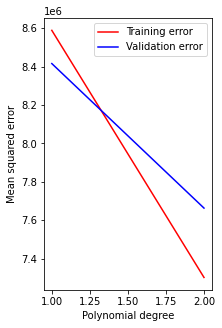

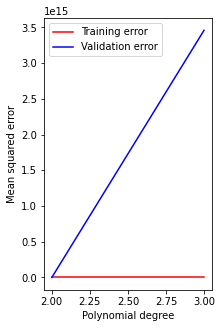

In [43]:
degrees = [1, 2]

degrees_2 = [2, 3]

fig, axs = plt.subplots(figsize=(3, 5))
axs.plot(degrees, [tr_error_3, tr_error_2], color='red', label='Training error')
axs.plot(degrees, [val_error_3, val_error_2], color='blue', label='Validation error')
axs.set_xlabel('Polynomial degree')
axs.set_ylabel('Mean squared error')
axs.legend()

fig, axs = plt.subplots(figsize=(3, 5))
axs.plot(degrees_2, [tr_error_2, tr_error], color='red', label='Training error')
axs.plot(degrees_2, [val_error_2, val_error], color='blue', label='Validation error')
axs.set_xlabel('Polynomial degree')
axs.set_ylabel('Mean squared error')
axs.legend()

